**Análise de dados realizada no Curso de Análise de Dados com Pandas da Ânima PT.2**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment


In [44]:
df = pd.read_excel("gas_novembro_df.xlsx")

In [45]:
#Inserção simples de coluna
df["Ativo"] = True
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168409 entries, 0 to 168408
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Regiao - Sigla     168409 non-null  object        
 1   Estado - Sigla     168409 non-null  object        
 2   Municipio          168409 non-null  object        
 3   Revenda            168409 non-null  object        
 4   CNPJ da Revenda    168409 non-null  object        
 5   Nome da Rua        168409 non-null  object        
 6   Numero Rua         168353 non-null  object        
 7   Complemento        35057 non-null   object        
 8   Bairro             168043 non-null  object        
 9   Cep                168409 non-null  object        
 10  Produto            168409 non-null  object        
 11  Data da Coleta     168409 non-null  datetime64[ns]
 12  Valor de Venda     168409 non-null  float64       
 13  Valor de Compra    0 non-null       float64 

None

In [46]:
#Criando uma coluna "Obs" extra preenchendo "Melhor Cidade" quando for no Município de RECIFE, PE.
df["Obs."] = ["MELHOR CIDADE" if munic == "RECIFE" else None for munic in df["Municipio"]]
display(df.loc[df["Municipio"].isin(["RECIFE", "SAO PAULO", "CAMPINAS"]), ["Municipio", "Obs."]])

,Municipio,Obs.
658,RECIFE,MELHOR CIDADE
659,RECIFE,MELHOR CIDADE
660,RECIFE,MELHOR CIDADE
661,RECIFE,MELHOR CIDADE
662,RECIFE,MELHOR CIDADE
...,...,...
167893,RECIFE,MELHOR CIDADE
167894,RECIFE,MELHOR CIDADE
168175,RECIFE,MELHOR CIDADE
168176,RECIFE,MELHOR CIDADE


In [47]:
#Criando coluna "Status" para categorizar o preço dos produtos com numpy.
df["Status de Preço"] = np.where(df["Valor de Venda"] > 6.0, "Caro", "Barato")
display(df[["Valor de Venda", "Status de Preço"]])

,Valor de Venda,Status de Preço
0,6.799,Caro
1,5.299,Barato
2,5.549,Barato
3,6.899,Caro
4,5.649,Barato
...,...,...
168404,5.859,Barato
168405,6.580,Caro
168406,4.740,Barato
168407,5.448,Barato


In [48]:
#Importando DF com alguns números de habitantes e separando os ";" do csv
num_hab_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_hab_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_hab_df)

,Municipio,Estado - Sigla,NumHabitantes2021
0,BELO HORIZONTE,MG,2530701
1,CAMPINAS,SP,1223237
2,CAMPO GRANDE,MS,916001
3,CURITIBA,PR,1963726
4,GOIANIA,GO,1555626
5,INDAIATUBA,SP,260690
6,NATAL,RN,803739
7,PALMAS,TO,313349
8,PENAPOLIS,SP,64098
9,PORTO ALEGRE,RS,1492530


In [49]:
#Fazendo MERGE dos dois DFs
merge_df = df.merge(num_hab_df, how="inner", on=["Municipio", "Estado - Sigla"])
display(merge_df)
print(merge_df.info())

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,Ativo,Obs.,Status de Preço,NumHabitantes2021
0,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA,2021-11-01,6.999,NaN,R$ / litro,RAIZEN,True,None,Caro,1555626
1,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,ETANOL,2021-11-01,4.990,NaN,R$ / litro,RAIZEN,True,None,Barato,1555626
2,CO,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,AVENIDA VEREADOR JOSE MONTEIRO,1854,QUADRA08 LOTE 11E,SETOR NEGRAO DE LIMA,74650-300,GASOLINA ADITIVADA,2021-11-01,7.130,NaN,R$ / litro,RAIZEN,True,None,Caro,1555626
3,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,GASOLINA,2021-11-01,6.990,NaN,R$ / litro,BRANCA,True,None,Caro,1555626
4,CO,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,AVENIDA INDEPENDENCIA,2.908,NaN,VILA NOVA,74645-010,ETANOL,2021-11-01,4.990,NaN,R$ / litro,BRANCA,True,None,Barato,1555626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,SE,SP,INDAIATUBA,POSTO DOS ESTEVES LTDA,20.763.169/0001-00,AVENIDA ITORORO,160,NaN,CENTRO,13330-055,GASOLINA,2021-12-28,6.499,NaN,R$ / litro,IPIRANGA,True,None,Caro,260690
20630,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,DIESEL S10,2021-12-28,5.499,NaN,R$ / litro,RAIZEN,True,None,Barato,260690
20631,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,GASOLINA ADITIVADA,2021-12-28,6.699,NaN,R$ / litro,RAIZEN,True,None,Caro,260690
20632,SE,SP,INDAIATUBA,ABDELNOR VI COMERCIO DE COMBUSTIVEIS LTDA,30.253.289/0001-11,AVENIDA PRESIDENTE KENNEDY,496,NaN,CIDADE NOVA I,13334-170,ETANOL,2021-12-28,4.899,NaN,R$ / litro,RAIZEN,True,None,Barato,260690


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     20634 non-null  object        
 1   Estado - Sigla     20634 non-null  object        
 2   Municipio          20634 non-null  object        
 3   Revenda            20634 non-null  object        
 4   CNPJ da Revenda    20634 non-null  object        
 5   Nome da Rua        20634 non-null  object        
 6   Numero Rua         20634 non-null  object        
 7   Complemento        3837 non-null   object        
 8   Bairro             20634 non-null  object        
 9   Cep                20634 non-null  object        
 10  Produto            20634 non-null  object        
 11  Data da Coleta     20634 non-null  datetime64[ns]
 12  Valor de Venda     20634 non-null  float64       
 13  Valor de Compra    0 non-null      float64       
 14  Unidad

In [50]:
#Apagando colunas nulas com dropna
merge_df.dropna(axis=1, inplace=True)
display(merge_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Regiao - Sigla     20634 non-null  object        
 1   Estado - Sigla     20634 non-null  object        
 2   Municipio          20634 non-null  object        
 3   Revenda            20634 non-null  object        
 4   CNPJ da Revenda    20634 non-null  object        
 5   Nome da Rua        20634 non-null  object        
 6   Numero Rua         20634 non-null  object        
 7   Bairro             20634 non-null  object        
 8   Cep                20634 non-null  object        
 9   Produto            20634 non-null  object        
 10  Data da Coleta     20634 non-null  datetime64[ns]
 11  Valor de Venda     20634 non-null  float64       
 12  Unidade de Medida  20634 non-null  object        
 13  Bandeira           20634 non-null  object        
 14  Ativo 

None

In [51]:
#Apagando colunas específicas
colunas = ["Regiao - Sigla", "Nome da Rua", "Numero Rua", "Bairro", "Cep", "Produto", "Data da Coleta", "Valor de Venda", "Unidade de Medida", "Bandeira", "Ativo", "Status de Preço"]
merge_df.drop(colunas, axis=1, inplace=True)
display(merge_df.info())
display(merge_df.head(150))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20634 entries, 0 to 20633
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     20634 non-null  object
 1   Municipio          20634 non-null  object
 2   Revenda            20634 non-null  object
 3   CNPJ da Revenda    20634 non-null  object
 4   NumHabitantes2021  20634 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 967.2+ KB


None

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
...,...,...,...,...,...
145,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626
146,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626
147,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626
148,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626


In [52]:
display(merge_df.head(150))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
1,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
2,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
4,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
...,...,...,...,...,...
145,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626
146,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626
147,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626
148,GO,GOIANIA,POSTO Z + Z T-63 LTDA,01.559.584/0001-00,1555626


In [53]:
#Apagando linhas duplicadas
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(150))

,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,NumHabitantes2021
0,GO,GOIANIA,AERO SETE AUTO POSTO LTDA,37.831.484/0001-20,1555626
3,GO,GOIANIA,POSTO DO BOI LTDA,06.880.293/0001-25,1555626
7,GO,GOIANIA,POSTO DN LTDA,05.413.136/0001-47,1555626
11,GO,GOIANIA,POSTO ALDEIA LTDA,04.896.662/0001-42,1555626
15,GO,GOIANIA,AUTO POSTO SANTA LUZIA LTDA,04.142.631/0001-04,1555626
...,...,...,...,...,...
1902,RJ,RIO DE JANEIRO,POSTO DE ABASTECIMENTO A GAS SANTA AMELIA LTDA,04.198.018/0001-09,6775561
1907,RJ,RIO DE JANEIRO,POSTO RFD LTDA.,03.996.678/0001-64,6775561
1913,RJ,RIO DE JANEIRO,CENTRO DE CONVENIENCIAS MILLENNIUM LTDA,03.546.544/0002-22,6775561
1917,RJ,RIO DE JANEIRO,POSTO DE ABASTECIMENTO IMPERIAL 2000 LTDA,03.447.202/0001-74,6775561


In [54]:
#Agrupando e contando os postos de cada cidade
postos_municipio_df = merge_df.groupby(by=["Estado - Sigla", "Municipio", "NumHabitantes2021"]).count()
postos_municipio_df.drop("CNPJ da Revenda", axis=1, inplace=True)
postos_municipio_df.rename(columns={"Revenda": "Núm. Postos"}, inplace=True)
postos_municipio_df.reset_index(inplace=True)
display(postos_municipio_df)
display(postos_municipio_df.info())

,Estado - Sigla,Municipio,NumHabitantes2021,Núm. Postos
0,AC,RIO BRANCO,419452,44
1,GO,GOIANIA,1555626,93
2,MG,BELO HORIZONTE,2530701,54
3,MS,CAMPO GRANDE,916001,104
4,PR,CURITIBA,1963726,110
5,RJ,RIO DE JANEIRO,6775561,379
6,RN,NATAL,803739,37
7,RO,PORTO VELHO,548952,40
8,RS,PORTO ALEGRE,1492530,73
9,SP,CAMPINAS,1223237,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estado - Sigla     15 non-null     object
 1   Municipio          15 non-null     object
 2   NumHabitantes2021  15 non-null     int64 
 3   Núm. Postos        15 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 608.0+ bytes


None

In [55]:
#Criando coluna de Habitantes por Posto
postos_municipio_df["Habitantes/Posto"] = (postos_municipio_df["NumHabitantes2021"] / postos_municipio_df["Núm. Postos"])
display(postos_municipio_df)

,Estado - Sigla,Municipio,NumHabitantes2021,Núm. Postos,Habitantes/Posto
0,AC,RIO BRANCO,419452,44,9533.000000
1,GO,GOIANIA,1555626,93,16727.161290
2,MG,BELO HORIZONTE,2530701,54,46864.833333
3,MS,CAMPO GRANDE,916001,104,8807.701923
4,PR,CURITIBA,1963726,110,17852.054545
5,RJ,RIO DE JANEIRO,6775561,379,17877.469657
6,RN,NATAL,803739,37,21722.675676
7,RO,PORTO VELHO,548952,40,13723.800000
8,RS,PORTO ALEGRE,1492530,73,20445.616438
9,SP,CAMPINAS,1223237,51,23985.039216


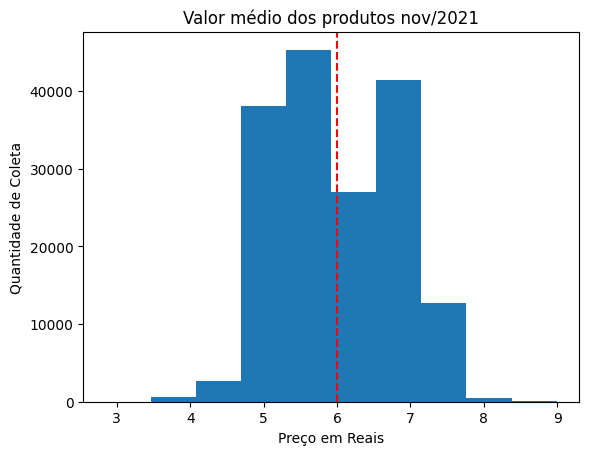

In [56]:
#Começando a gerar gráficos
plt.hist(df["Valor de Venda"])
#Título
plt.title("Valor médio dos produtos nov/2021")
#Rótulos
plt.xlabel("Preço em Reais")
plt.ylabel("Quantidade de Coleta")

plt.axvline(x=df["Valor de Venda"].mean(), color="red", linestyle="dashed")


plt.show()

In [57]:
#Agrupando e salvando a média do valor dos produtos
plot_mean = df["Valor de Venda"].groupby(by=df["Produto"]).mean().round(2)
display(plot_mean)


Produto
DIESEL                5.38
DIESEL S10            5.45
ETANOL                5.46
GASOLINA              6.71
GASOLINA ADITIVADA    6.86
GNV                   4.39
Name: Valor de Venda, dtype: float64

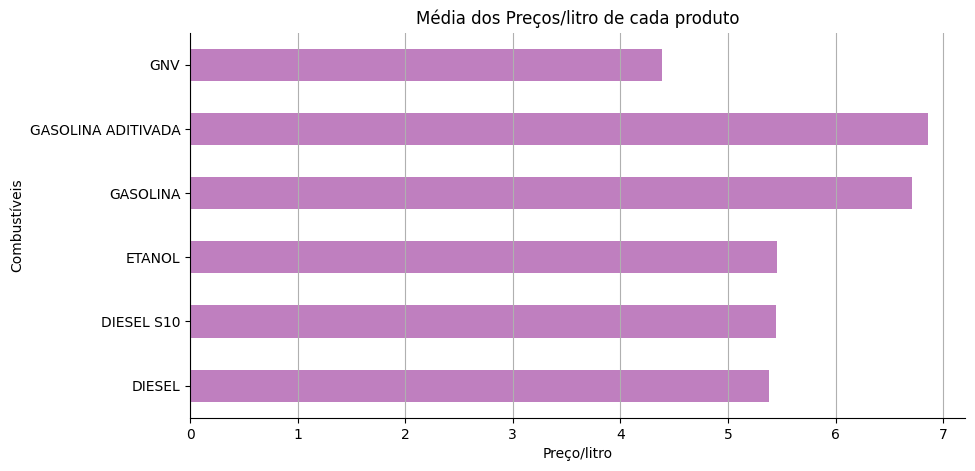

In [58]:
#Gerando outro tipo de gráfico
plt.figure(figsize=(10,5))

#Plotando

plot_mean.plot(kind="barh", 
    ylabel="Combustíveis", 
    xlabel="Preço/litro", 
    color="purple", 
    title="Média dos Preços/litro de cada produto", 
    alpha=0.5)      #alpha = opacidade

#Removendo bordas com Seaborn
sns.despine()


plt.grid(axis="x")
plt.show()

In [59]:
#Exportando planilha Excel
plan_excel = "media_litro.xlsx"
plot_mean.to_excel(plan_excel, "Sumário")

In [72]:
#Personalizando planilha Excel com openpyxl
#Abrindo ela
wb = load_workbook(plan_excel)

#Pegando a Sheet certa
work_sheet = wb["Sumário"]

#Pintando o cabeçalho
bg_blue = PatternFill("solid", fgColor="54458a")

coords = ["A1", "B1"]
for coord in coords:
    work_sheet[coord].fill = bg_blue
    work_sheet[coord].font = Font(color="ffffff", bold=True)

#Condicional de cor (> 6.5 = red)
num_row = 2
while num_row <= work_sheet.max_row:
    coord = "B" + str(num_row)
    if work_sheet[coord].value >= 6.5:
        work_sheet[coord].font = Font(color="FF0000", bold=True)
    num_row += 1


#Salvando Excel
wb.save(plan_excel)